<a href="https://colab.research.google.com/github/michaelkennedy47/Share/blob/main/Hybrid_HW3_Share.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1**

80.95238095238095
189.23076923076923


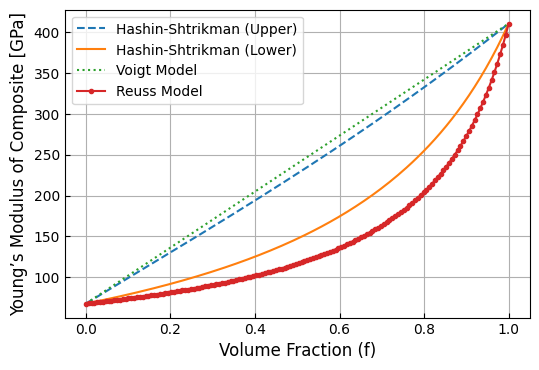

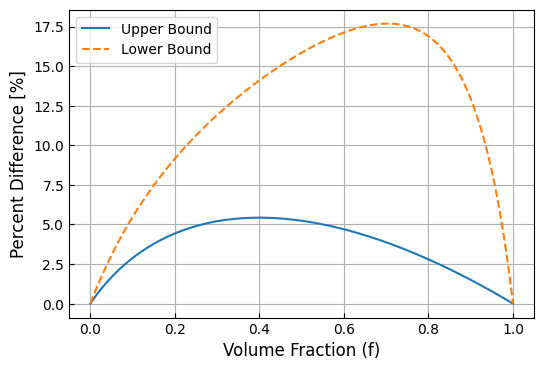

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

E_1 = 68 #Youngs modulus of the matrix material
G_1 = 25 #Shear modulus of the matrix material

E_2 = 410 #Youngs modulus of the reinforment material
G_2 = 180 #Shear modulus of the reinforment material

E_r = E_2
E_m = E_1

#>>> Calculate Bulk Modulus

K_1 = (E_1*G_1) / (9*G_1-3*E_1)
K_2 = (E_2*G_2) / (9*G_2-3*E_2)

print(K_1)
print(K_2)

#>>> Volume Fraction

v_2 = np.linspace(0, 1, 150)
v_1 = 1-v_2
f = v_2

#>>> Hashin-Shtrikman Composite Bounds

K_1_Star = K_1 + v_2/((1/(K_2-K_1))+((3*v_1)/(3*K_1+4*G_1)))
K_2_Star = K_2 + v_1/((1/(K_1-K_2))+((3*v_2)/(3*K_2+4*G_2)))

G_1_Star = G_1 + v_2/((1/(G_2-G_1))+((6*(K_1+2*G_1)*v_1))/(5*G_1*(3*K_1+4*G_1)))
G_2_Star = G_2 + v_1/((1/(G_1-G_2))+((6*(K_2+2*G_1)*v_2))/(5*G_2*(3*K_2+4*G_2)))

E_1_Star = (9*K_1_Star*G_1_Star)/(3*K_1_Star+G_1_Star)
E_2_Star = (9*K_2_Star*G_2_Star)/(3*K_2_Star+G_2_Star)

#>>> Equal Stress Composite Lower Bound (Reuss Model)

E_R = 1/(f/E_r+(1-f)/E_m)

#>>> Equal Strain Composite Upper Bound (Voigt Model)

E_V = f*E_r + (1-f)*E_m

#>>>

Error_Upper = abs(E_V-E_2_Star)/((E_V+E_2_Star)/2) * 100
Error_Lower = abs(E_R-E_1_Star)/((E_V+E_1_Star)/2) * 100

#>>> Plots

params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium',
         'xtick.direction':'in',
         'ytick.direction':'in',
         }
plt.rcParams.update(params)

plt.plot(v_2,E_2_Star,'--',label="Hashin-Shtrikman (Upper)")
plt.plot(v_2,E_1_Star,'-',label="Hashin-Shtrikman (Lower)")

plt.plot(v_2,E_V,':',label="Voigt Model")
plt.plot(v_2,E_R,'.-',label="Reuss Model")

plt.xlabel("Volume Fraction (f)")
plt.ylabel("Young’s Modulus of Composite [GPa]")
plt.legend(loc="upper left")
plt.grid()
plt.gcf().set_size_inches(6, 4)  # Set the size of the figure in inches (width, height)

# Save the plot
plt.savefig('Modulus_Hashin.png', dpi=300, bbox_inches = "tight")  # Save the plot as 'plot.png' with 300 DPI

plt.show()

plt.plot(v_2,Error_Upper,'-',label="Upper Bound")
plt.plot(v_2,Error_Lower,'--',label="Lower Bound")
plt.xlabel("Volume Fraction (f)")
plt.ylabel("Percent Difference [%]")
plt.legend(loc="upper left")
plt.grid()
plt.gcf().set_size_inches(6, 4)  # Set the size of the figure in inches (width, height)

# Save the plot
plt.savefig('Modulus_Hashin_Error.png', dpi=300, bbox_inches = "tight")  # Save the plot as 'plot.png' with 300 DPI

plt.show()

**Problem 2**

Halpin-Tsai

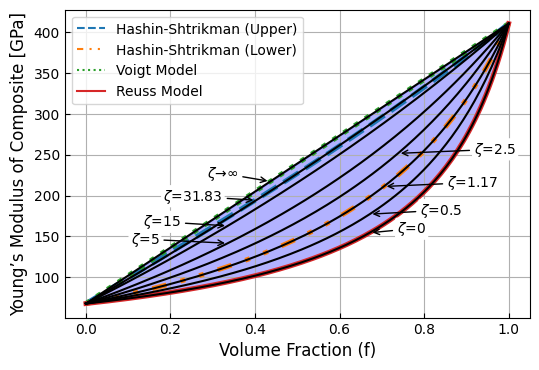

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def nu(zeta,E_r,E_m):
    return ((E_r/E_m)-1)/((E_r/E_m)+zeta)

def Halpin(zeta,f,E_r,E_m):
  return E_m*((1+zeta*nu(zeta,E_r,E_m)*f)/(1-nu(zeta,E_r,E_m)*f))

def Halpin_fit(f,zeta):
  E_m = 68
  E_r = 410
  return E_m*((1+zeta*nu(zeta,E_r,E_m)*f)/(1-nu(zeta,E_r,E_m)*f))

E_1 = 68 #Youngs modulus of the matrix material
G_1 = 25 #Shear modulus of the matrix material

E_2 = 410 #Youngs modulus of the reinforment material
G_2 = 180 #Shear modulus of the reinforment material

E_r = E_2
E_m = E_1

#>>> Calculate Bulk Modulus

K_1 = (E_1*G_1) / (9*G_1-3*E_1)
K_2 = (E_2*G_2) / (9*G_2-3*E_2)

#>>> Volume Fraction

v_2 = np.linspace(0, 1, 150)
v_1 = 1-v_2
f = v_2

#>>> Zeta

zeta_max = 10000000
zeta_min = 0

#>>> Hashin-Shtrikman Composite Bounds

K_1_Star = K_1 + v_2/((1/(K_2-K_1))+((3*v_1)/(3*K_1+4*G_1)))
K_2_Star = K_2 + v_1/((1/(K_1-K_2))+((3*v_2)/(3*K_2+4*G_2)))

G_1_Star = G_1 + v_2/((1/(G_2-G_1))+((6*(K_1+2*G_1)*v_1))/(5*G_1*(3*K_1+4*G_1)))
G_2_Star = G_2 + v_1/((1/(G_1-G_2))+((6*(K_2+2*G_1)*v_2))/(5*G_2*(3*K_2+4*G_2)))

E_1_Star = (9*K_1_Star*G_1_Star)/(3*K_1_Star+G_1_Star)
E_2_Star = (9*K_2_Star*G_2_Star)/(3*K_2_Star+G_2_Star)

#>>> Equal Stress Composite Lower Bound (Reuss Model)

E_R = 1/(f/E_r+(1-f)/E_m)

#>>> Equal Strain Composite Upper Bound (Voigt Model)

E_V = f*E_r + (1-f)*E_m

#>>> Find Zeta for Hashin-Shtrikman Lower Bound

Lower_Fit, _ = curve_fit(Halpin_fit, f, E_1_Star)

#>>> Find Zeta for Hashin-Shtrikman Upper Bound

Upper_Fit, _ = curve_fit(Halpin_fit, f, E_2_Star)

#>>> Plots

params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium',
         'xtick.direction':'in',
         'ytick.direction':'in',
         }
plt.rcParams.update(params)

# Create a figure and axis
fig, ax = plt.subplots()

plt.plot(v_2,E_2_Star,'--',label="Hashin-Shtrikman (Upper)",linewidth=3.5)
plt.plot(v_2,E_1_Star,linestyle=((0, (3, 3, 1, 3, 1, 3))),label="Hashin-Shtrikman (Lower)",linewidth=3.5)

plt.plot(v_2,E_V,':',label="Voigt Model",linewidth=3.5)
plt.plot(v_2,E_R,linestyle='solid',label="Reuss Model",linewidth=3.5)

zeta_0 = Halpin(zeta_min,f,E_r,E_m)
plt.plot(v_2,zeta_0,'-',color="black")
plt.annotate('$\zeta$=0', xy=(v_2[100], zeta_0[100]), xytext=(v_2[100] + 0.065, zeta_0[100] + 0.05),
             bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.1'),
             arrowprops=dict(facecolor='blue', arrowstyle='->'))

zeta_0p5 = Halpin(0.5,f,E_r,E_m)
plt.plot(v_2,zeta_0p5,'-',color="black")
plt.annotate('$\zeta$=0.5', xy=(v_2[100], zeta_0p5[100]), xytext=(v_2[100] + 0.12, zeta_0p5[100] + 0.05),
             bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.1'),
             arrowprops=dict(facecolor='blue', arrowstyle='->'))

zeta_3 = Halpin(2.5,f,E_r,E_m)
plt.plot(v_2,zeta_3,'-',color="black")
plt.annotate('$\zeta$=2.5', xy=(v_2[110], zeta_3[110]), xytext=(v_2[110] + 0.18, zeta_3[110] + 0.05),
             bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.1'),
             arrowprops=dict(facecolor='blue', arrowstyle='->'))

zeta_5 = Halpin(5,f,E_r,E_m)
plt.plot(v_2,zeta_5,'-',color="black")
plt.annotate('$\zeta$=5', xy=(v_2[50], zeta_5[50]), xytext=(v_2[50] - 0.23, zeta_5[50] + 0.05),
             bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.1'),
             arrowprops=dict(facecolor='blue', arrowstyle='->'))

zeta_15 = Halpin(15,f,E_r,E_m)
plt.plot(v_2,zeta_15,'-',color="black")
plt.annotate('$\zeta$=15', xy=(v_2[50], zeta_15[50]), xytext=(v_2[50] - 0.2, zeta_15[50] + 0.05),
             bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.1'),
             arrowprops=dict(facecolor='blue', arrowstyle='->'))

zeta_inf = Halpin(zeta_max,f,E_r,E_m)
plt.plot(v_2,zeta_inf,'-',color="black")
plt.annotate('$\zeta$→∞', xy=(v_2[65], zeta_inf[65]), xytext=(v_2[65] - 0.15, zeta_inf[65] + 5),
             bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.1'),
             arrowprops=dict(facecolor='blue', arrowstyle='->'))

zeta_HS_Lower = Halpin_fit(f,*Lower_Fit)
plt.plot(v_2,zeta_HS_Lower,'-',color="black")
plt.annotate('$\zeta$='+str(round(*Lower_Fit, 2)), xy=(v_2[105], zeta_HS_Lower[105]), xytext=(v_2[105] + 0.15, zeta_HS_Lower[105] + 0.075),
             bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.1'),
             arrowprops=dict(facecolor='blue', arrowstyle='->'))

zeta_HS_Upper = Halpin_fit(f,*Upper_Fit)
plt.plot(v_2,zeta_HS_Upper,'-',color="black")
plt.annotate('$\zeta$='+str(round(*Upper_Fit, 2)), xy=(v_2[60], zeta_HS_Upper[60]), xytext=(v_2[60] - 0.22, zeta_HS_Upper[60] + 0.075),
             bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.1'),
             arrowprops=dict(facecolor='blue', arrowstyle='->'))

# Fill the area between y1 and y2
ax.fill_between(v_2, Halpin(zeta_min,f,E_r,E_m), Halpin(zeta_max,f,E_r,E_m), color='blue', alpha=0.3)

plt.xlabel("Volume Fraction (f)")
plt.ylabel("Young’s Modulus of Composite [GPa]")
plt.legend(loc="upper left")

# get the legend object
leg = ax.legend()

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(1.5)
plt.grid()
plt.gcf().set_size_inches(6, 4)  # Set the size of the figure in inches (width, height)

# Save the plot
plt.savefig('Modulus_Halpin.png', dpi=300, bbox_inches = "tight")  # Save the plot as 'plot.png' with 300 DPI

plt.show()



**Problem 3**

Pan Design

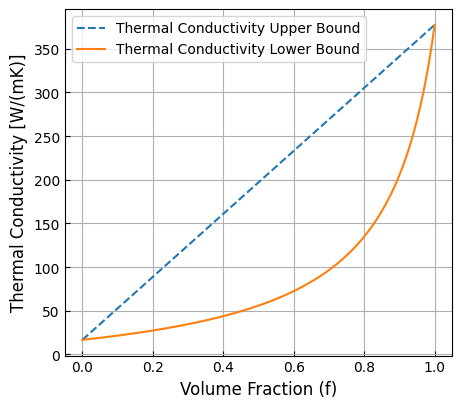

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#>>> User Inputs

therm_r = 377.5 #The thermal conductivity of the filler
therm_m = 16.7 #The thermal conductivity of the matrix

#>>> Volume Fraction

f = np.linspace(0, 1, 150)

#>>> Upper Bound (Rule of Mixtures)

therm_UB = f*therm_r + (1-f)*therm_m

#>>> Lower Bound (Maxwell)

therm_LB = therm_m*((therm_r+2*therm_m-2*f*(therm_m-therm_r))/(therm_r+2*therm_m+f*(therm_m-therm_r)))

#>>> Plot

params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium',
         'xtick.direction':'in',
         'ytick.direction':'in',
         }
plt.rcParams.update(params)

plt.plot(f,therm_UB,'--',label="Thermal Conductivity Upper Bound")
plt.plot(f,therm_LB,'-',label="Thermal Conductivity Lower Bound")

plt.xlabel("Volume Fraction (f)")
plt.ylabel("Thermal Conductivity [W/(mK)]")
plt.legend(loc="upper left")

plt.grid()

plt.gcf().set_size_inches(5, 4.5)  # Set the size of the figure in inches (width, height)

# Save the plot
plt.savefig('Thermal_conductivity.png', dpi=300, bbox_inches = "tight")  # Save the plot as 'plot.png' with 300 DPI

plt.show()

**Problem 4**

Percolation

Spherical Percolation Threshold
1.0
Spherical Percolation Saturation Threshold
0.99999999999999999995
Flakes Percolation Threshold
0.06666666666666667
Flakes Percolation Saturation Threshold
0.21143547273559687525
Nanowires Percolation Threshold
2.5e-05
Nanowires Percolation Saturation Threshold
0.0011225626313979672148


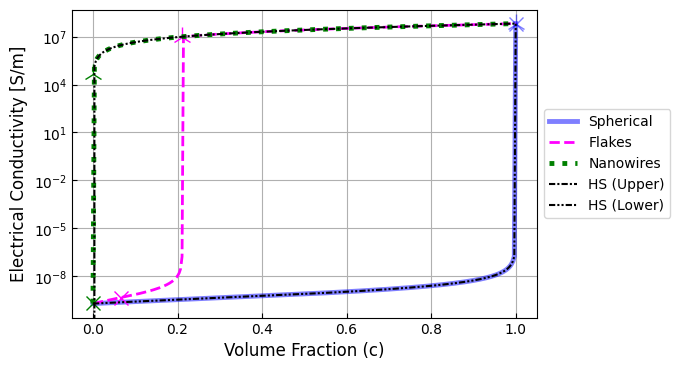

Spherical 45 vol.%
[6.8904865927272729045e-10]
Flake 20 vol.%
[1.06648681028623783305e-08]
Nanowire 10 vol.%
[4449388.2089655160657]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from decimal import Decimal

def S11_Fun(alpha):
    if alpha > 1:
      return ((alpha/(2*(alpha**2-1)**(3/2)))*(alpha*(alpha**2-1)**(1/2)-(np.arccosh(alpha))))
    if alpha < 1:
      return ((alpha/(2*(1-alpha**2)**(3/2)))*((np.arccos(alpha))-alpha*(1-alpha**2)**(1/2)))
    if alpha == 1:
      return (1/3)

def c_starstar(n,T_bar):
    return((3*(2*n**2-n-1-3*n*T_bar))/(2*(n-1)**2*T_bar))

def sigma_comp(c,c_starstar,T_bar,sigma_1,sigma_0):

    sigma_out = []

    for i in c:
      if i <= c_starstar:
        sigma_e = sigma_0*(1+(i*T_bar)/(1-(i*T_bar)/3))
        sigma_out.append(sigma_e)

      else:
        sigma_e_HS = sigma_1*(1+((1-i)*(sigma_0-sigma_1))/((1/3)*i*(sigma_0-sigma_1)+sigma_1))
        sigma_out.append(sigma_e_HS)

    return(sigma_out)

def c_star(alpha):
    if alpha >= 1:
      return(1/alpha**2)
    if alpha < 1:
      return(alpha)
#>>>> User Inputs

P_1_c = 1*10**(-6) #the distance in the c axis, or the unsymmetric axis length
P_1_a = 1*10**(-6)  #the distance in the a axis, or the length of the two axes with the same magnitude

sigma_1_1 = np.float128(64516129.03) #S/m
sigma_0_1 = np.float128(1.99461454E-10) #S/m

P_2_c = 0.4*10**(-6)
P_2_a = 6*10**(-6)

sigma_1_2 = sigma_1_1
sigma_0_2 = sigma_0_1

P_3_c = 20*10**(-6)
P_3_a = 0.100*10**(-6)

sigma_1_3 = sigma_1_1
sigma_0_3 = sigma_0_1

#>>>> Calculations Spherical
alpha_1 = P_1_c/P_1_a

S11_1 = S11_Fun(alpha_1)
S22_1 = S11_1
S33_1 = 1 - 2*S11_1

n_1 = sigma_1_1 / sigma_0_1

T_bar_1 = ((n_1-1)/3)*((1/(1+(n_1-1)*S11_1))+(1/(1+(n_1-1)*S22_1))+(1/(1+(n_1-1)*S33_1)))

c = np.linspace(0, 1, 300)

c_starstar_1 = c_starstar(n_1,T_bar_1)

sigma_comp_1 = sigma_comp(c,c_starstar_1,T_bar_1,sigma_1_1,sigma_0_1)

c_star_1 = c_star(alpha_1)

#>>>> Calculations Flakes
alpha_2 = P_2_c/P_2_a

S11_2 = S11_Fun(alpha_2)
S22_2 = S11_2
S33_2 = 1 - 2*S11_2

n_2 = sigma_1_2 / sigma_0_2

T_bar_2 = ((n_2-1)/3)*((1/(1+(n_2-1)*S11_2))+(1/(1+(n_2-1)*S22_2))+(1/(1+(n_2-1)*S33_2)))

c = np.linspace(0, 1, 300)

c_starstar_2 = c_starstar(n_2,T_bar_2)

sigma_comp_2 = sigma_comp(c,c_starstar_2,T_bar_2,sigma_1_2,sigma_0_2)

c_star_2 = c_star(alpha_2)

#>>>> Calculations Nanowires
alpha_3 = P_3_c/P_3_a

S11_3 = S11_Fun(alpha_3)
S22_3 = S11_3
S33_3 = 1 - 2*S11_3

n_3 = sigma_1_3 / sigma_0_3

T_bar_3 = ((n_3-1)/3)*((1/(1+(n_3-1)*S11_3))+(1/(1+(n_3-1)*S22_3))+(1/(1+(n_3-1)*S33_3)))

c = np.linspace(0, 1, 300)

c_starstar_3 = c_starstar(n_3,T_bar_3)

sigma_comp_3 = sigma_comp(c,c_starstar_3,T_bar_3,sigma_1_3,sigma_0_3)

c_star_3 = c_star(alpha_3)

#>>>> Upper Bound Calculation

HS_Upper = sigma_1_1*(1+((1-c)*(sigma_0_1-sigma_1_1))/((1/3)*c*(sigma_0_1-sigma_1_1)+sigma_1_1))

#>>>> Lower Bound Calculation

HS_Lower = sigma_0_1*(1+(c*(sigma_1_1-sigma_0_1))/((1/3)*(1-c)*(sigma_1_1-sigma_0_1)+sigma_0_1))

params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium',
         'xtick.direction':'in',
         'ytick.direction':'in',
         }
plt.rcParams.update(params)
fig, ax = plt.subplots()
plt.plot(c,sigma_comp_1,'-',label="Spherical",linewidth=3.5, color="blue",alpha=0.5)
plt.plot(c_star_1,sigma_comp([c_star_1],c_starstar_1,T_bar_1,sigma_1_1,sigma_0_1),'x',markersize=10,color="blue",alpha=0.5)
plt.plot(c_starstar_1,sigma_comp([c_starstar_1],c_starstar_1,T_bar_1,sigma_1_1,sigma_0_1),'2',markersize=15,color="blue",alpha=0.5)
print('Spherical Percolation Threshold')
print(c_star_1)
print('Spherical Percolation Saturation Threshold')
print(c_starstar_1)

plt.plot(c,sigma_comp_2,'--',label="Flakes",linewidth=2,color="magenta")
plt.plot(c_star_2,sigma_comp([c_star_2],c_starstar_2,T_bar_2,sigma_1_2,sigma_0_2),'x',markersize=10,color="magenta")
plt.plot(c_starstar_2,sigma_comp([c_starstar_2],c_starstar_2,T_bar_2,sigma_1_2,sigma_0_2),'2',markersize=15,color="magenta")
print('Flakes Percolation Threshold')
print(c_star_2)
print('Flakes Percolation Saturation Threshold')
print(c_starstar_2)

plt.plot(c,sigma_comp_3,':',label="Nanowires",linewidth=3.5,color="green")
plt.plot(c_star_3,sigma_comp([c_star_3],c_starstar_3,T_bar_3,sigma_1_3,sigma_0_3),'x',markersize=10,color="green")
plt.plot(c_starstar_3,sigma_comp([c_starstar_3],c_starstar_3,T_bar_3,sigma_1_3,sigma_0_3),'2',markersize=15,color="green")
print('Nanowires Percolation Threshold')
print(c_star_3)
print('Nanowires Percolation Saturation Threshold')
print(c_starstar_3)

plt.plot(c,HS_Upper,linestyle=((0, (3, 1, 1, 1))),label="HS (Upper)",linewidth=1.5,color="black")
plt.plot(c,HS_Lower,linestyle=((0, (3, 1, 1, 1, 1, 1))),label="HS (Lower)",linewidth=1.5,color="black")

#plt.plot(v_2,E_1_Star,'--',label="Hashin-Shtrikman (Lower)")
plt.yscale('log')
plt.gca().yaxis.set_minor_locator(plt.NullLocator())
plt.gca().yaxis.set_minor_formatter(plt.NullFormatter())
plt.xlabel("Volume Fraction (c)")
plt.ylabel("Electrical Conductivity [S/m]")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid()

plt.gcf().set_size_inches(6, 4)  # Set the size of the figure in inches (width, height)

# Save the plot
plt.savefig('Electrical Conductivity.png', dpi=300, bbox_inches = "tight")  # Save the plot as 'plot.png' with 300 DPI

plt.show()

#>>>> Conductivity Calculation for part b

c_b_1 = 0.45
sigma_b_1 = sigma_comp([c_b_1],c_starstar_1,T_bar_1,sigma_1_1,sigma_0_1)

print('Spherical 45 vol.%')
print(sigma_b_1)

c_b_2 = 0.20
sigma_b_2 = sigma_comp([c_b_2],c_starstar_2,T_bar_2,sigma_1_2,sigma_0_2)
print('Flake 20 vol.%')
print(sigma_b_2)

c_b_3 = 0.10
sigma_b_3 = sigma_comp([c_b_3],c_starstar_3,T_bar_3,sigma_1_3,sigma_0_3)
print('Nanowire 10 vol.%')
print(sigma_b_3)